<a href="https://colab.research.google.com/github/junghyun9108/NLP_class/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install selenium
!pip install konlpy wordcloud
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 13 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [65]:
import re
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

In [66]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://news.naver.com/"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

네이버 뉴스


In [67]:
comment_texts = driver.find_elements(By.CLASS_NAME, 'comment_text')
for tmp in comment_texts:
    print(tmp.text)

In [68]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [69]:
import re

clean_titles = []

# strong 태그에 클래스가 cnf_news_title인 요소 모두 선택
titles = soup.select('strong.cnf_news_title')

# 텍스트만 출력
for tag in titles:
    raw = tag.get_text(strip=True)
    clean = re.sub(r'^\[.*?\]\s*', '', raw)
    clean_titles.append(clean)

print(clean_titles)

['“SKT 먹통 후 알뜰폰 개통돼 5000만원 인출”…부산서 해킹피해 신고', "중국, 정부 주도로 '비밀경찰' 통해 반체제인사 탄압 의혹", "유심 동나고 시스템 지연…SKT 무료 교체 첫날, 곳곳서 '혼선'[현장+]", '초등학생 대상 부적절한 신체접촉 혐의 교장 기소', '대구 함지산 대형 산불…대응 최고 3단계 발령', '\'이재명 최측근\' 정진상, 증언거부... "검찰도 언론도 못 믿어"', '"서면조사도 가능?"‥검찰 "물어볼 게 많아 대면 조사해야"', '대구 함지산 산불, 입산 통제구역서 발화..야간에도 진화', '1400원→1550원…수도권 지하철요금 6월 28일부터 인상', "'서울대 10개 만들기' 가능할까? 이젠 바꿔야 한다", '산림청 "대구 북구 산불 진화율 54%"', '"가족 전부 SKT라도 바꿔"…주가 \'휘청\'에 투심도 번호 이동', '여수서 침몰한 서경호 선체 수색 종료…나머지 3명은 어디에', '피고인석 2열 앉은 그 남자의 ‘눈 가리고 아웅’', '검사시보 이재명 “마음 쉽게 못고쳐, 벌 받을땐 벌 받아야” 청탁 거절', '대구 함지산 산불…산불 3단계 야간 대응, 진화율 47%', '공식 후보 된 이재명, 한덕수에 직격탄…"헌재 판결 무시, 명확한 헌법 파괴행위이자 사실상 내란행위"', '"너무 많이 차린다 했더니"… 청년들 뛰어들었다 \'한숨\' 쉬게 만든 업종', '대구 동구 목재가공 창고에도 화재… 3시간 반 만에 진화', '"SKT 유심 사용하지 마세요"…네카오, 임직원에 교체 권고', "민주, 행안소위서 '지역화폐 1조원' 추경안 단독 처리…국힘 반발 퇴장", "대구 산불 이재민 대피소 '북적'…헬기 야간 투입", '\'추경 호소\' 한덕수 \'예결위 불출석\'⋯野 "사퇴하려면 당장 하라"', 'SKT 유심 교체 첫날 23만명만 유심 수령.. 가입자 1%', "'경기 불안할 땐 여기'…대선 다가오자 주가 급등한 종목", 'Korea’s per capita GDP set to fall below 2022 le

In [70]:
text = ' '.join(clean_titles)

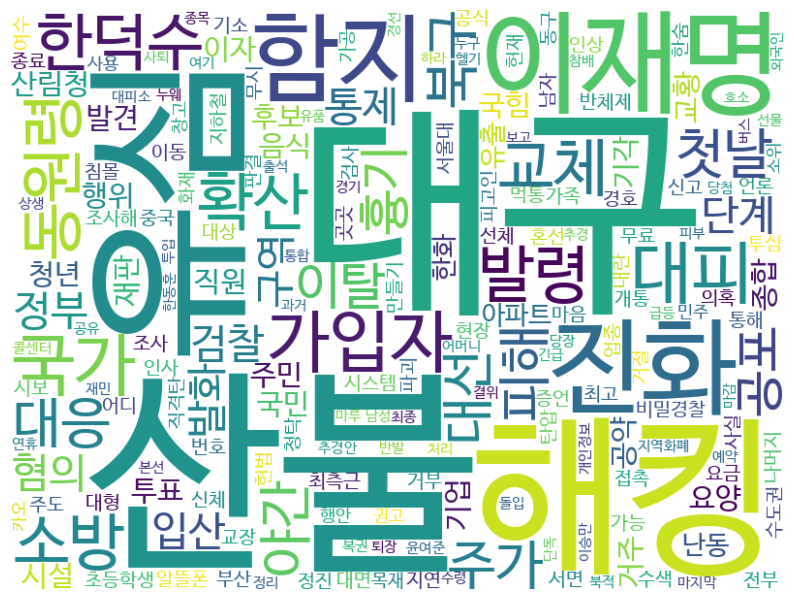

In [71]:
# 3. 형태소 분석기로 명사만 추출 (길이 2자 이상 필터)
okt = Okt()
nouns = okt.nouns(text)
filtered = [word for word in nouns if len(word) > 1]

# 4. 단어 빈도 계산
counts = Counter(filtered)

# 5. 워드클라우드 생성
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    background_color='white',
    width=800,
    height=600
)
wc.generate_from_frequencies(counts)

# 6. 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-72-b3b5ddeb5cd4>:29: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

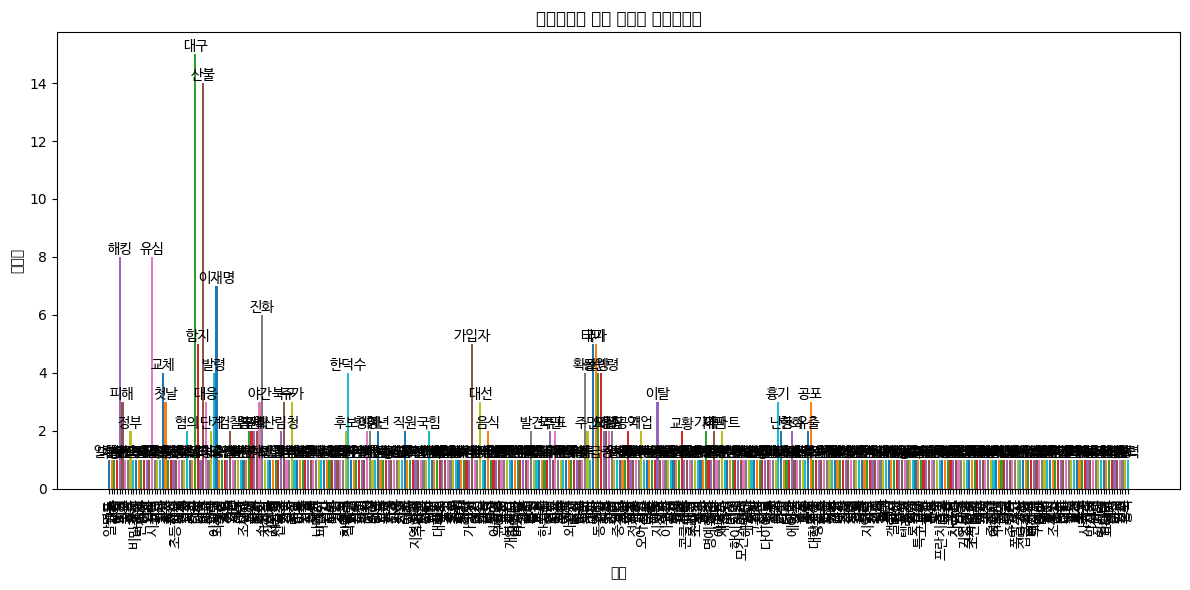

In [72]:

words = list(counts.keys())
frequencies = list(counts.values())

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 히스토그램 생성
plt.figure(figsize=(12, 6))

# 막대 생성 및 텍스트 추가
for i, (word, frequency) in enumerate(zip(words, frequencies)):
    bar = plt.bar(i, frequency, label=word)  # 막대 생성

    # 텍스트 객체 생성 및 폰트 설정
    text = plt.text(
        bar[0].get_x() + bar[0].get_width() / 2,
        bar[0].get_height(),
        word,
        ha='center',
        va='bottom',
        fontproperties=fontprop
    )

plt.title('네이버뉴스 단어 빈도수 히스토그램')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(range(len(words)), words, rotation=90, fontproperties=fontprop)  # x축 눈금 레이블에 폰트 설정
plt.tight_layout()
plt.show()